In [1]:
import pandas as pd
import numpy as np
import shared
import json


In [2]:
ve_or_ju = "ju"

In [3]:
runs_df = pd.read_csv(f'data/runs_{ve_or_ju}.tsv', delimiter="\t")


In [4]:
country_counts = runs_df["team_country"].value_counts()
top_country_counts = country_counts[country_counts > 50]
top_countries = top_country_counts.keys().tolist()
display(top_countries)

with open(f"data/top_countries_{ve_or_ju}.json", 'w') as outfile:
    json.dump(top_countries, outfile)

['FIN',
 'SWE',
 'NOR',
 'RUS',
 'LAT',
 'EST',
 'SUI',
 'GBR',
 'LTU',
 'DEN',
 'GER',
 'FRA',
 'ESP',
 'CZE',
 'ITA',
 'POL',
 'USA',
 'UKR',
 'HUN']

In [5]:
runs_df["first_name"] = runs_df.name.str.split(" ", expand=True).iloc[:, 0]
fn_counts = runs_df["first_name"].value_counts()
top_fn_counts = fn_counts[fn_counts > 20]
top_first_names = top_fn_counts.keys().tolist()
display(top_first_names)

with open(f"data/top_first_names_{ve_or_ju}.json", 'w') as outfile:
    json.dump(top_first_names, outfile)

['mikko',
 'antti',
 'timo',
 'juha',
 'matti',
 'jukka',
 'pekka',
 'mika',
 'jari',
 'jussi',
 'janne',
 'ville',
 'hannu',
 'heikki',
 'kari',
 'markku',
 'petri',
 'sami',
 'tuomas',
 'teemu',
 'marko',
 'harri',
 'lauri',
 'markus',
 'ari',
 'pasi',
 'vesa',
 'olli',
 'jouni',
 'jaakko',
 'eero',
 'arto',
 'tero',
 'juho',
 'tommi',
 'kimmo',
 'jani',
 'jarmo',
 'seppo',
 'risto',
 'tomi',
 'ilkka',
 'esa',
 'jarkko',
 'kalle',
 'tuomo',
 'tapio',
 'jyrki',
 'anders',
 'johan',
 'jorma',
 'simo',
 'erkki',
 'erik',
 'toni',
 'juhani',
 'jouko',
 'petteri',
 'jonas',
 'mikael',
 'joonas',
 'henrik',
 'lasse',
 'pertti',
 'aleksi',
 'martin',
 'henri',
 'jan',
 'aki',
 'niko',
 'samuli',
 'andreas',
 'anssi',
 'juuso',
 'esko',
 'pauli',
 'matias',
 'fredrik',
 'paavo',
 'miika',
 'joni',
 'peter',
 'riku',
 'niklas',
 'anton',
 'tapani',
 'daniel',
 'reijo',
 'martti',
 'kai',
 'jarno',
 'panu',
 'raimo',
 'stefan',
 'thomas',
 'keijo',
 'per',
 'magnus',
 'simon',
 'sakari',
 'pen

In [6]:
# Temporarily remove 2018 in order to try predict it in other notebook
runs_df = runs_df[runs_df.year != 2018]
runs_df

,name,year,team_id,team,team_country,pace,leg_nro,num_runs,first_name
1,joni hirvikallio,2017,16,KOOVEE,FIN,5.762,1,6,joni
2,joni hirvikallio,2016,143,KOOVEE,FIN,6.251,6,6,joni
3,joni hirvikallio,2015,12,KOOVEE,FIN,5.843,5,6,joni
4,joni hirvikallio,2013,37,KOOVEE,FIN,5.796,1,6,joni
6,topi anjala,2017,1,KOOVEE,FIN,5.621,1,7,topi
7,topi anjala,2016,9,KOOVEE,FIN,6.100,1,7,topi
8,topi anjala,2015,12,KOOVEE,FIN,5.977,1,7,topi
9,topi anjala,2014,21,KOOVEE,FIN,7.164,2,7,topi
10,topi anjala,2013,37,KOOVEE,FIN,5.642,7,7,topi
11,topi anjala,2012,48,KOOVEE,FIN,5.974,3,7,topi


In [7]:
features = shared.preprocess_features(runs_df, top_countries, top_first_names)
features.head(10)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 64184 entries, 1 to 76530
Data columns (total 9 columns):
name            64184 non-null object
year            64184 non-null int64
team_id         64184 non-null int64
team            64184 non-null object
team_country    63349 non-null object
pace            64184 non-null float64
leg_nro         64184 non-null int64
num_runs        64184 non-null int64
first_name      64184 non-null object
dtypes: float64(1), int64(4), object(4)
memory usage: 4.9+ MB


None

,team_id,team_id_log10,team_id_square,leg_1,leg_2,leg_3,leg_4,leg_5,leg_6,leg_7,...,fn_viktor,fn_vili,fn_ville,fn_visa,fn_vladimir,fn_väinö,fn_william,fn_yrjö,fn_öystein,fn_öyvind
1,16,1.204120,256,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,143,2.155336,20449,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,12,1.079181,144,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,37,1.568202,1369,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0.000000,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,9,0.954243,81,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,12,1.079181,144,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,21,1.322219,441,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,37,1.568202,1369,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
11,48,1.681241,2304,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
features.info()

<class 'pandas.core.sparse.frame.SparseDataFrame'>
Int64Index: 64184 entries, 1 to 76530
Columns: 491 entries, team_id to fn_öyvind
dtypes: Sparse[float64, nan](1), Sparse[int64, nan](2), Sparse[uint8, 0](488)
memory usage: 5.7 MB


In [9]:
x = features.values
#x = features[["team_id", "team_id_log10", "team_id_log100", "team_id_log2", "team_id_square", "leg_id_1", "leg_id_2", "leg_id_3", "leg_id_4", "leg_id_5", "leg_id_6", "leg_id_7"]].values # Poista tää.
y = np.log(runs_df.pace.values)
y = y.reshape(len(y), 1)

display(x.shape)
display(y.shape)

(64184, 491)

(64184, 1)

In [10]:
import sklearn
from sklearn import linear_model
from sklearn import ensemble
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import joblib

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2019)
x_train.shape

(51347, 491)

In [12]:
import matplotlib.pyplot as plt
def fit_and_test_model(model, x_train, x_test, y_train, y_test, fit_params={}):
    model.fit(x_train, y_train.ravel(), **fit_params)
    y_pred = np.exp(model.predict(x_test))
    print(f"Shapes: y_test={np.exp(y_test).shape} y_pred={y_pred.shape}")
    print("Mean squared error: %.3f" % mean_squared_error(np.exp(y_test), y_pred))
    print('Explained variance score: %.3f' % r2_score(np.exp(y_test), y_pred))
    
    plt.scatter(x_test[:,0], np.exp(y_test),  color='red', alpha=0.01)
    plt.scatter(x_test[:,0], y_pred, color='blue', alpha=0.01)
    plt.ylim(4, 20)
    plt.show()

In [13]:
y_train.shape

(51347, 1)

Shapes: y_test=(12837, 1) y_pred=(12837,)
Mean squared error: 5.345
Explained variance score: 0.391


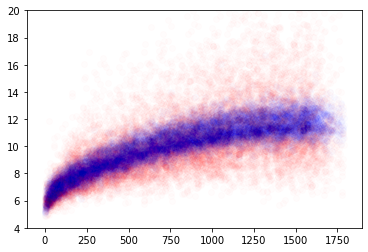

CPU times: user 7.38 s, sys: 718 ms, total: 8.1 s
Wall time: 2.94 s


In [14]:
%%time
linear = linear_model.LinearRegression()
fit_and_test_model(linear, x_train, x_test, y_train, y_test)

In [15]:
pd.DataFrame({'name':features.keys(), 'coef':linear.coef_})

,name,coef
0,team_id,4.272078e-04
1,team_id_log10,1.111814e-01
2,team_id_square,-1.438268e-07
3,leg_1,1.057622e+05
4,leg_2,1.057623e+05
5,leg_3,1.057623e+05
6,leg_4,1.057624e+05
7,leg_5,1.057624e+05
8,leg_6,1.057623e+05
9,leg_7,1.057623e+05


      Iter       Train Loss   Remaining Time 
         1           0.0626          163.02m
         2           0.0581          161.15m
         3           0.0545          160.31m
         4           0.0515          159.73m
         5           0.0489          159.96m
         6           0.0469          159.61m
         7           0.0451          159.62m
         8           0.0437          159.35m
         9           0.0424          159.78m
        10           0.0414          159.91m
        20           0.0367          159.44m
        30           0.0354          156.19m
        40           0.0347          154.47m
        50           0.0344          152.14m
        60           0.0342          149.51m
        70           0.0341          147.55m
        80           0.0339          146.19m
        90           0.0338          144.74m
       100           0.0337          143.48m
       200           0.0332          136.66m
       300           0.0328          133.47m
       40

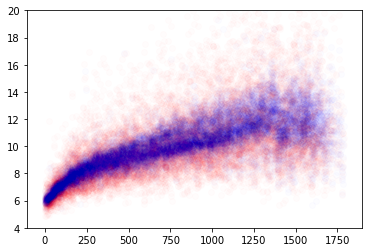

CPU times: user 2h 16min 37s, sys: 9.22 s, total: 2h 16min 46s
Wall time: 2h 16min 52s


In [16]:
%%time
gbr_num_estimators=7100
gbr = sklearn.ensemble.GradientBoostingRegressor(n_estimators=gbr_num_estimators, random_state=0, verbose=1)

fit_and_test_model(gbr, x_train, x_test, y_train, y_test)

#print(f"feature_importances_: {gbr.feature_importances_}")
#gbr_features = pd.DataFrame({'feature':first_names.columns, 'importance': gbr.feature_importances_})
#gbr_features['feature'] = gbr_features['feature'].str.replace('top_first_name_','')
#display(gbr_features.sort_values(by="importance", ascending=False))

In [17]:
gbr_num_estimators_quantile=int(gbr_num_estimators/2)

      Iter       Train Loss   Remaining Time 
         1           0.0567           74.71m
         2           0.0542           75.03m
         3           0.0522           72.42m
         4           0.0506           71.79m
         5           0.0490           72.71m
         6           0.0477           73.14m
         7           0.0466           73.27m
         8           0.0457           73.68m
         9           0.0449           73.87m
        10           0.0442           74.21m
        20           0.0412           74.35m
        30           0.0404           74.95m
        40           0.0400           74.87m
        50           0.0398           74.21m
        60           0.0397           73.38m
        70           0.0396           72.38m
        80           0.0396           71.68m
        90           0.0395           71.06m
       100           0.0395           70.52m
       200           0.0392           66.74m
       300           0.0390           64.13m
       40

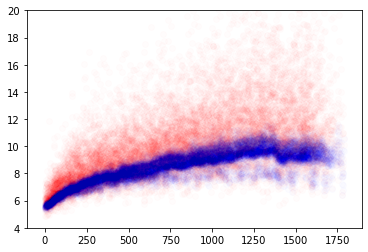

In [18]:
gbr_q_low = sklearn.ensemble.GradientBoostingRegressor(loss='quantile', alpha=0.159, n_estimators=gbr_num_estimators_quantile, random_state=0, verbose=1)
fit_and_test_model(gbr_q_low, x_train, x_test, y_train, y_test)


      Iter       Train Loss   Remaining Time 
         1           0.0642           76.55m
         2           0.0622           77.95m
         3           0.0604           79.10m
         4           0.0589           79.82m
         5           0.0576           80.03m
         6           0.0564           80.20m
         7           0.0554           80.31m
         8           0.0545           80.47m
         9           0.0537           80.64m
        10           0.0530           80.42m
        20           0.0492           79.54m
        30           0.0478           78.17m
        40           0.0472           76.75m
        50           0.0469           75.90m
        60           0.0467           74.63m
        70           0.0466           73.59m
        80           0.0465           72.83m
        90           0.0464           72.00m
       100           0.0463           71.34m
       200           0.0459           67.28m
       300           0.0457           64.50m
       40

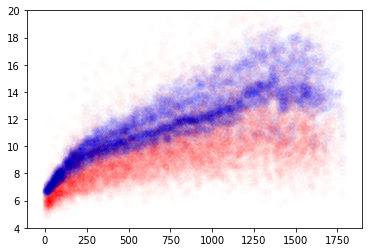

In [19]:
gbr_q_high = sklearn.ensemble.GradientBoostingRegressor(loss='quantile', alpha=0.841, n_estimators=gbr_num_estimators_quantile, random_state=0, verbose=1)
fit_and_test_model(gbr_q_high, x_train, x_test, y_train, y_test)



In [20]:
joblib.dump(gbr, 'gbr.sav')
joblib.dump(gbr_q_low, 'gbr_q_low.sav')
joblib.dump(gbr_q_high, 'gbr_q_high.sav')


['gbr_q_high.sav']

In [21]:
gbr_preds = gbr.predict(pd.DataFrame(x_test))
gbr_q_low_preds = gbr_q_low.predict(pd.DataFrame(x_test))
gbr_q_high_preds = gbr_q_high.predict(pd.DataFrame(x_test))

In [22]:
gbr_q_pred_errors = pd.DataFrame({
    'q_low':np.exp(gbr_q_low_preds),
    'true':np.exp(y_test).ravel(), 
    'predicted':np.exp(gbr_preds), 
    'q_high':np.exp(gbr_q_high_preds), 
})

gbr_q_pred_errors["q_low_error"] = gbr_q_pred_errors.true < gbr_q_pred_errors.q_low
gbr_q_pred_errors["q_high_error"] = gbr_q_pred_errors.true > gbr_q_pred_errors.q_high
gbr_q_pred_errors["q_error"] = np.logical_or(gbr_q_pred_errors.q_low_error, gbr_q_pred_errors.q_high_error)

# Intentionally don't use log scale for calculation to get bigger std 
gbr_q_pred_errors["std"] = (gbr_q_pred_errors.q_high - gbr_q_pred_errors.q_low) / 2
gbr_q_pred_errors["std_correct"] = np.exp((gbr_q_high_preds - gbr_q_low_preds) / 2)
gbr_q_pred_errors["abs_error"] = np.abs(gbr_q_pred_errors.predicted - gbr_q_pred_errors.true)
gbr_q_pred_errors["abs_error_in_stds"] = gbr_q_pred_errors.abs_error / np.exp(gbr_q_pred_errors["std_correct"])

display(gbr_q_pred_errors.tail(15).round(3))
display(gbr_q_pred_errors.q_low_error.mean())
display(gbr_q_pred_errors.q_high_error.mean())
display(gbr_q_pred_errors.q_error.mean())
display(gbr_q_pred_errors["std"].mean())
display(gbr_q_pred_errors["std_correct"].mean())
display(gbr_q_pred_errors["abs_error_in_stds"].mean())

,q_low,true,predicted,q_high,q_low_error,q_high_error,q_error,std,std_correct,abs_error,abs_error_in_stds
12822,8.981,9.839,9.695,11.629,False,False,False,1.324,1.138,0.144,0.046
12823,8.513,9.587,9.907,11.155,False,False,False,1.321,1.145,0.320,0.102
12824,6.757,6.736,7.974,8.659,True,False,True,0.951,1.132,1.238,0.399
12825,8.808,8.877,10.368,12.444,False,False,False,1.818,1.189,1.491,0.454
12826,8.914,9.270,10.654,12.778,False,False,False,1.932,1.197,1.384,0.418
12827,8.651,18.745,12.806,16.188,False,True,True,3.768,1.368,5.939,1.512
12828,7.226,7.286,7.679,9.464,False,False,False,1.119,1.144,0.393,0.125
12829,9.110,9.101,9.252,12.909,True,False,True,1.899,1.190,0.151,0.046
12830,8.620,11.466,10.587,12.090,False,False,False,1.735,1.184,0.879,0.269
12831,7.418,9.353,8.826,9.963,False,False,False,1.272,1.159,0.527,0.166


0.164836020877152

0.16218742696891797

0.32702344784606996

1.7953320376266584

1.1863322384468602

0.4601990293941801

In [23]:
np.exp(1.138)

3.1205210778255728

In [24]:
%%date

UsageError: Cell magic `%%date` not found.


In [ ]:
STOP_HERE

In [ ]:
import os
#os.environ['MKL_THREADING_LAYER'] = 'GNU'
os.environ['THEANO_FLAGS'] = 'device=cpu'
#os.environ['THEANO_FLAGS'] = 'device=cuda,floatX=float32,force_device=True'

import pymc3 as pm
import pmlearn
from pmlearn.linear_model import LinearRegression
print('Running on pymc-learn v{}'.format(pmlearn.__version__))


In [ ]:
import multiprocessing
multiprocessing.cpu_count()

In [ ]:

pmlearn_linear = LinearRegression()
fit_params={
    "inference_type": "nuts",
    "inference_args": {
        "cores": multiprocessing.cpu_count() -1,
        #"chains":2,
        "init": 'adapt_diag',
        #"tune": 2000,
        "target_accept": 0.9999
    }
}
fit_and_test_model(pmlearn_linear, pd.DataFrame(data=x_train), pd.DataFrame(x_test), y_train, y_test,fit_params)

In [ ]:
pmlearn_preds = pmlearn_linear.predict(pd.DataFrame(x_test), return_std=True)

In [ ]:

joblib.dump(pmlearn_linear, 'pmlearn_linear.sav')

In [ ]:
pred_errors = pd.DataFrame({
    'mean':np.exp(pmlearn_preds[0]), 
    'std':np.exp(pmlearn_preds[1]), 
    'true':np.exp(y_test).ravel(), 
    'error':np.abs(np.exp(y_test).ravel() -np.exp(pmlearn_preds[0])) / np.exp(pmlearn_preds[1])
})
display(pred_errors.head(15))
pred_errors.error.mean()

In [ ]:
pmlearn_linear.plot_elbo()

In [ ]:
pm.traceplot(pmlearn_linear.trace)

In [ ]:
pm.forestplot(pmlearn_linear.trace, varnames=["betas", "alpha", "s"]);

In [ ]:
summary_df = pm.summary(pmlearn_linear.trace, varnames=["betas", "alpha", "s"])
summary_df

In [ ]:
pm.plot_posterior(pmlearn_linear.trace, varnames=["betas", "alpha", "s"],
                 figsize = [14, 8])

In [ ]:
pm.gelman_rubin(pmlearn_linear.trace, varnames=["betas", "alpha", "s"])